# Unveiling the Secrets of Wine Quality

Bypassing traditional tasting methods, this project employs data analysis to predict the quality of wine based on its chemical features.

In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

## 1. Extract Data

### 1.1 Using Python Library

In [3]:
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [10]:

df_wine_quality_features = pd.DataFrame(wine_quality['data']['features'])
df_wine_quality_targets = pd.DataFrame(wine_quality['data']['targets'])
df_wine_quality = pd.concat([df_wine_quality_features, df_wine_quality_targets], axis=1, join='inner')

df_wine_quality

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### 1.2 Reading from csv

In [12]:
df_white_wine = pd.read_csv("data/winequality-white.csv", sep=";")

df_red_wine = pd.read_csv("data/winequality-red.csv",sep=";")

df_red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
df_white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## 2. Clean Data

We are going to check if there are empty values.

In [6]:
df_wine_quality.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [14]:
df_wine_quality.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

# check the white wine 

In [17]:
df_white_wine.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [19]:
df_white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [18]:
df_white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [20]:
df_red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [22]:
df_red_wine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [23]:
df_red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Checking if we have outliers in our data

In [29]:
## Q-Q 
# boxplot - log scale 

def create_qq_plot(wine_type_df, wine_type):
    # Select only the numerical columns from the DataFrame
    numerical_columns = wine_type_df.select_dtypes(include=[np.number]).columns

    # Set up the matplotlib figure and axes for a 3x3 grid
    fig, axs = plt.subplots(3, 4, figsize=(15, 15))  # Adjust the size as needed

    # Flatten the array of axes to make it easier to iterate over
    axs = axs.flatten()

    # Loop over the numerical columns and create a Q-Q plot for each
    for i, column in enumerate(numerical_columns[:12]):  
        data = wine_type_df[column]
        stats.probplot(data, dist="norm", plot=axs[i])
        axs[i].set_title(f'Q-Q plot for {column}')

    # Adjust layout to prevent overlap
    fig.suptitle(f"QQ Plots for {wine_type}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



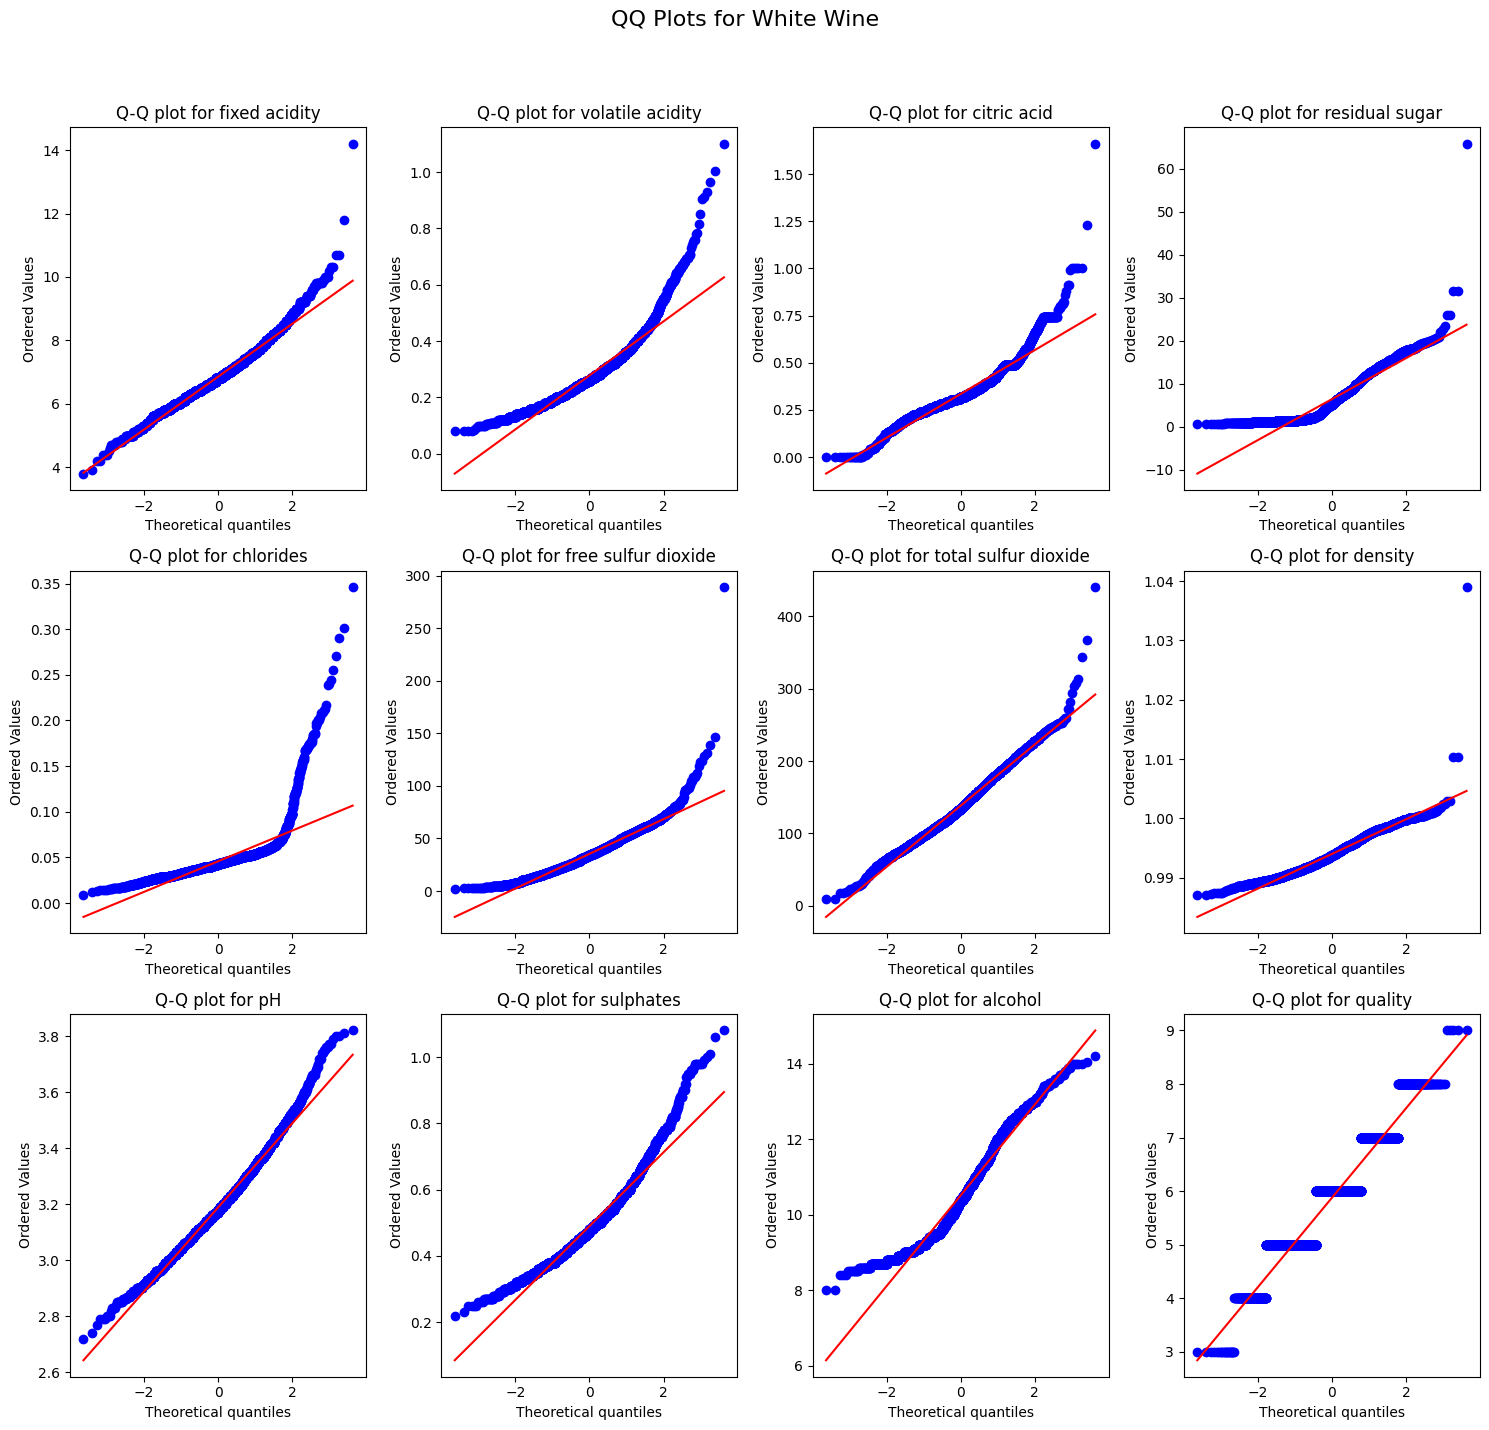

In [32]:
create_qq_plot(df_white_wine, 'White Wine')

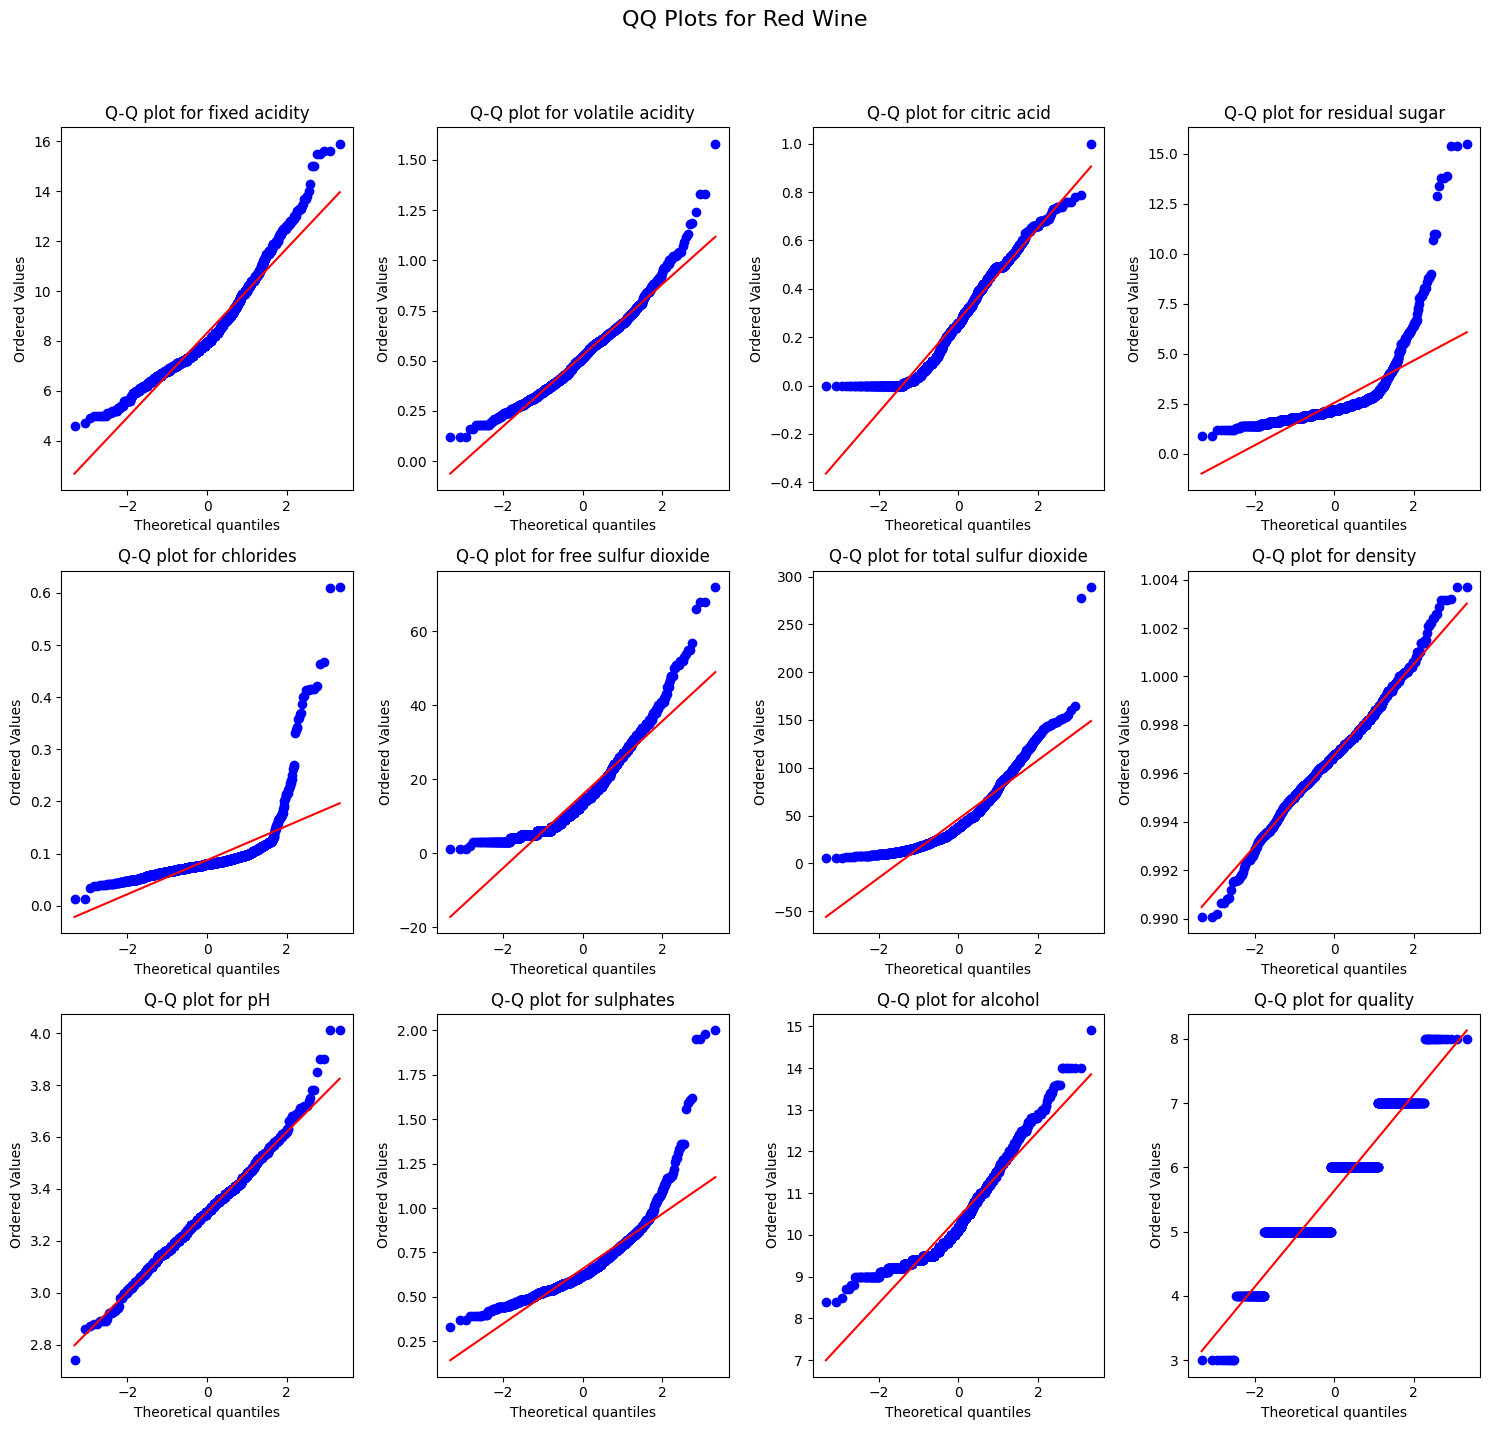

In [33]:
create_qq_plot(df_red_wine, 'Red Wine')

In [34]:
#scatterplots
import seaborn as sns

def create_scatter_plot(wine_type_df, wine_type):
    features_columns = wine_type_df.drop(columns=['quality']).columns.tolist()

    # Set up the matplotlib figure
    fig, axs = plt.subplots(len(feature_columns), figsize=(10, 5*len(feature_columns)))

    # Create a scatter plot for each feature column against the target
    for i, col in enumerate(feature_columns):
        sns.scatterplot(data=wine_type_df, x='quality', y=col, ax=axs[i])
        axs[i].set_title(f'Scatter plot of {col} vs. Target')

    
    fig.suptitle(f"Scatter Plots for {wine_type}", fontsize=16)
    plt.tight_layout()
    plt.show()

In [35]:
create_scatter_plot(df_white_wine, "White_Wine")

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x1303c3560> (for post_execute):


ValueError: Image size of 1000x2449000 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1000x2449000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x2.449e+06 with 3725 Axes>

In [10]:
sns.swarmplot(data = df_wine_quality, x = 'quality', y= 'density')

c:\Users\zosia\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 53.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\zosia\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 92.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\zosia\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 94.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\zosia\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 88.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

<AxesSubplot:xlabel='quality', ylabel='density'>

c:\Users\zosia\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 55.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\zosia\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 93.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\zosia\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 95.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\zosia\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 89.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

Error in callback <function flush_figures at 0x00000263EFD6D948> (for post_execute):


KeyboardInterrupt: 

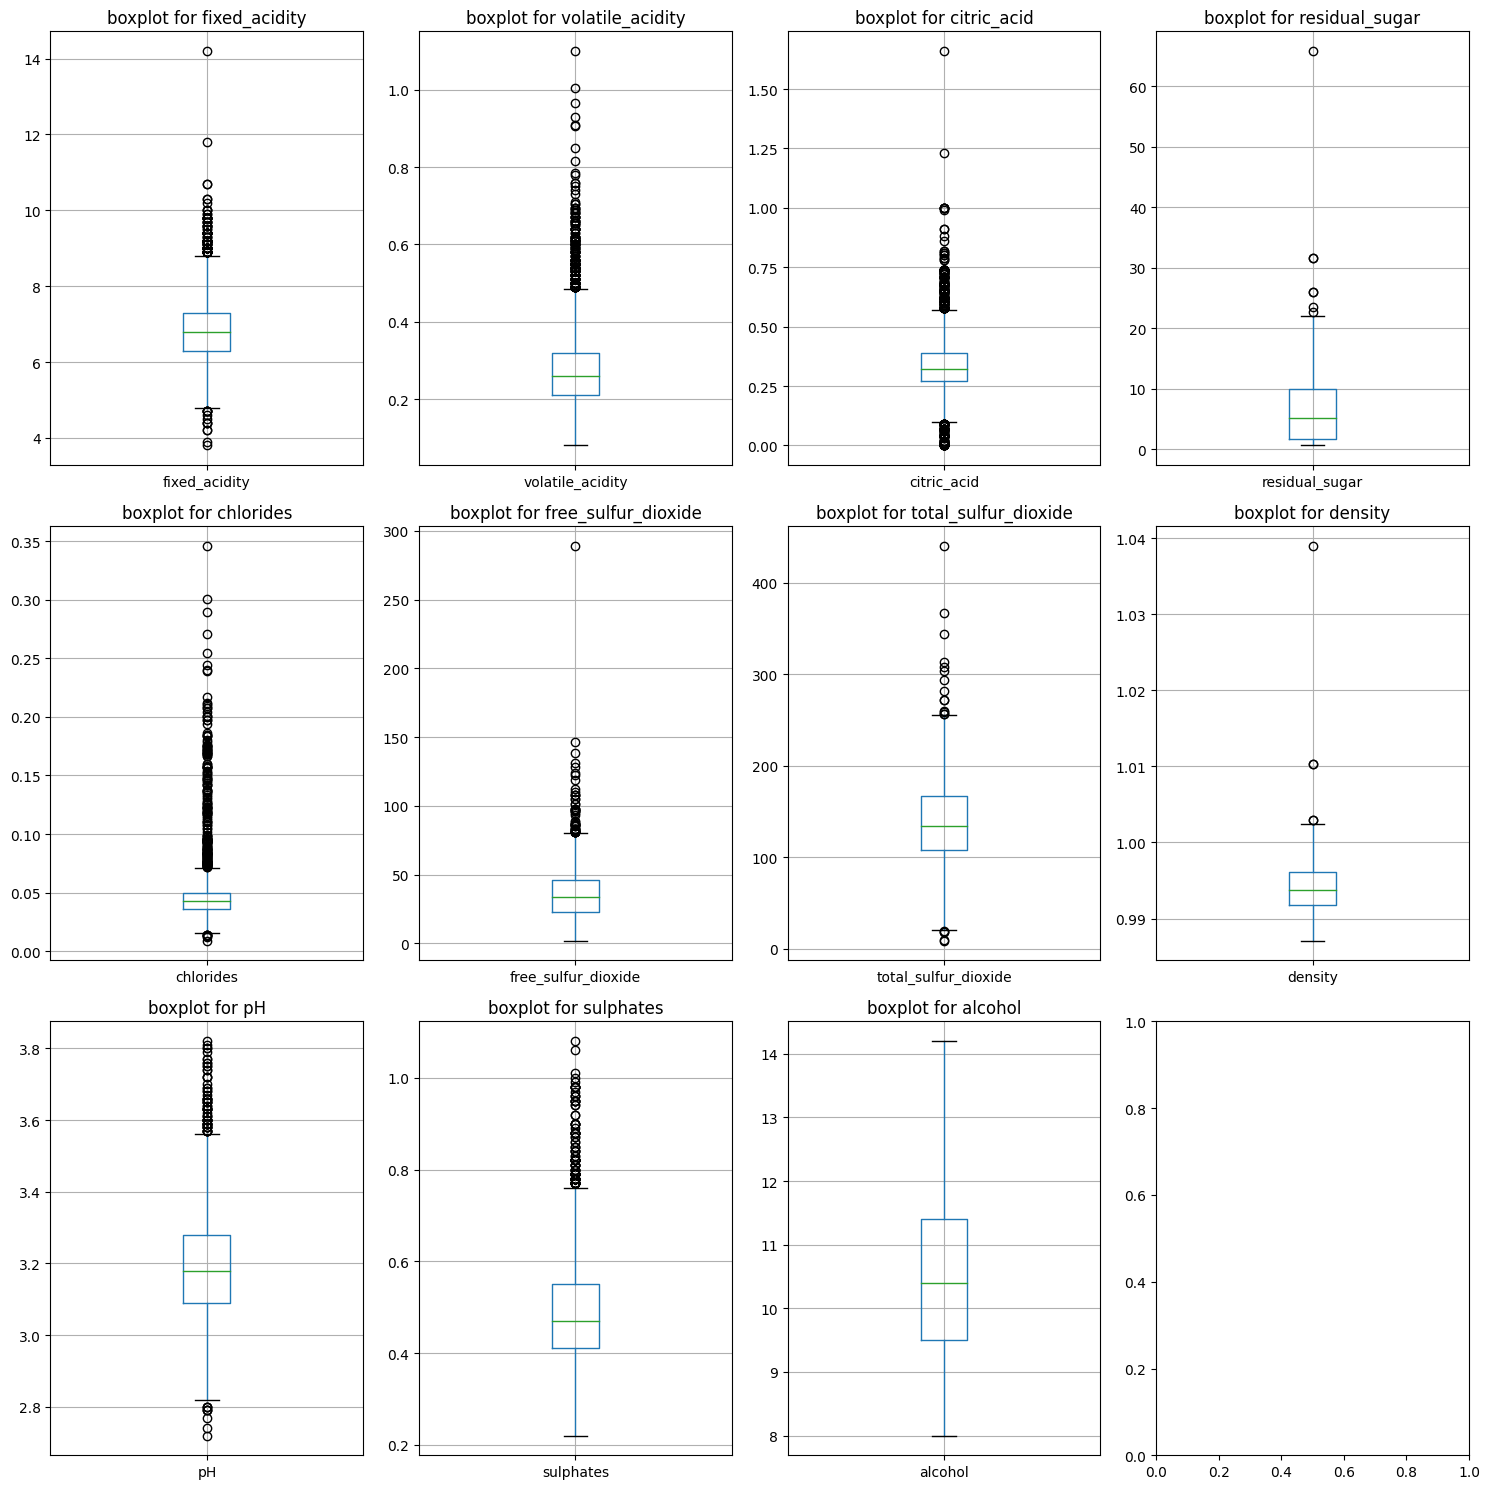

In [ ]:
#scatterplots


# Select only the numerical columns from the DataFrame
numerical_columns = df_wine_quality.select_dtypes(include=[np.number]).columns
fig, axs = plt.subplots(3, 4, figsize=(15, 15)) 
axs = axs.flatten()


# Create a scatter plot for each feature column against the target
for i, column in enumerate(numerical_columns[:11]):
    data = df_wine_quality[column]
    df_wine_quality_features.boxplot(column = column, ax=axs[i])
    axs[i].set_title(f'boxplot for {column}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Delete the outliers

In [ ]:
def remove_outliers(df, column, lower_percentile, upper_percentile):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    
    # Create a mask where values are within the inter-percentile range
    mask = (df[column] >= lower_bound) & (df[column] <= upper_bound)
    
    # Apply the mask to the DataFrame to keep rows without outliers
    return df[mask]

# Example usage: Remove outliers outside the 5th and 95th percentiles
#cleaned_df = remove_outliers(df_wine_quality_features, 'fixed_acidity', 0.00, 0.95)

heatmap

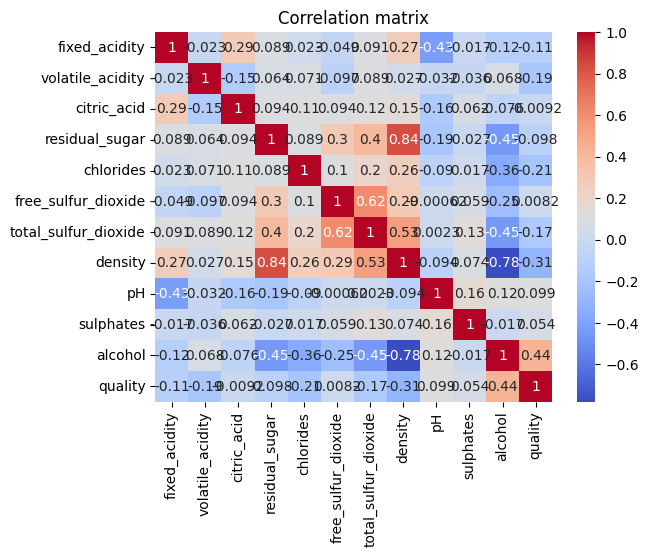

In [ ]:
import seaborn as sns
%matplotlib inline

correlation_matrix = df_wine_quality.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()


## EDA:

## Visualize Data

## Significant Statement

## Conclusion & Discussions